# Assignment 2 Question 1. Contrastive Language-Image Pretrained (CLIP) Model in Retinal Diagnosis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
!pip uninstall numpy torch
!pip install --no-cache-dir numpy==1.26.0
!pip install torch

Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.11/dist-packages/numpy-1.26.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.26.0
Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Would remove:
    /usr/local/bin/torchfrtrace
    /usr/local/bin/torchrun
    /usr/local/lib/python3.11/dist-packages/functorch/*
    /usr/local/lib/python3.11/dist-packages/torch-2.6.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/torch/*
    /usr/local/lib/python3.11/dist-packages/torchgen/*
Proceed (Y/n)? Y
  Successfully uninstalled torch-2.6.0
     ━━━━━━━━━━━━━

In [3]:
!pip install --no-cache-dir numpy==1.26.0

In [4]:
!pip uninstall -y numpy tensorflow numba transformers
!pip install --no-cache-dir numpy==1.26.0
!pip install transformers==4.41.0
!pip install tensorflow==2.18.0 numba==0.60.0

Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Successfully uninstalled numpy-1.26.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
Found existing installation: transformers 4.50.0
Uninstalling transformers-4.50.0:
  Successfully uninstalled transformers-4.50.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 193.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
librosa 0.11.0 requires numba>=0.51.0, which is not installed.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.

In [1]:
!pip install flair

In [2]:
!pip install kornia

In [ ]:
import os
os.chdir('/content/drive/MyDrive/elec4840/Code_Template_new/Q1') #Change to main directory Q1

In [4]:
def set_seeds(seed_value, use_cuda):
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    random.seed(seed_value)
    if use_cuda:
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

In [5]:
import torch
from model import FLAIRModel
from data.dataloader import get_dataloader_splits
from tqdm import tqdm
import numpy as np
import os
import random
import warnings
warnings.filterwarnings("ignore")

set_seeds(42, use_cuda=torch.cuda.is_available())

In [ ]:
unzipped_dir = "/content/drive/MyDrive/elec4840/Code_Template_new/Q1/IMAGES" #dataset path
all_files = os.listdir(unzipped_dir)


image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"✅ Total image files found: {len(image_files)}")

✅ Total image files found: 1748


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/elec4840/Code_Template_new/Q1/02_MESSIDOR.csv") #csv file path
csv_images = df["image"].apply(lambda x: os.path.basename(x)).tolist()

missing = [img for img in csv_images if img not in image_files]

print(f"🔍 Missing images: {len(missing)}")
if missing:
    print("⛔️ Example missing files:", missing[:5])
else:
    print("✅ All images listed in the CSV are found in the folder.")

🔍 Missing images: 0
✅ All images listed in the CSV are found in the folder.


## Get classification target and data splits.

In [7]:
targets={"no diabetic retinopathy": 0,
        "mild diabetic retinopathy": 1,
        "moderate diabetic retinopathy": 2,
        "severe diabetic retinopathy": 3,
        "proliferative diabetic retinopathy": 4}

loaders = get_dataloader_splits("./02_MESSIDOR.csv", "./IMAGES/", targets,
                                     shots_train="60%", shots_val="10%",
                                     shots_test="30%", balance=False,
                                     batch_size=4, num_workers=4, seed=42,
                                     task="classification", size= (512, 512),
                                     resize_canvas=False, batch_size_test=4)


## Define the CLIP Model

### Subtask 1: Text Encoder Construction.
- Please fill out the forward function of the class: TextModel in model.py to complete the textual feature extractor
- Please fill out the compute_text_embeddings function of the class: FLAIRModel in model.py to extract the text features

In [ ]:
!gdown --id 1l24_2IzwQdnaa034I0zcyDLs_zMujsbR

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1l24_2IzwQdnaa034I0zcyDLs_zMujsbR
From (redirected): https://drive.google.com/uc?id=1l24_2IzwQdnaa034I0zcyDLs_zMujsbR&confirm=t&uuid=8c239e81-7ad4-4fbd-91c0-de8c4277e9ac
To: /content/drive/MyDrive/elec4840/Code_Template_new/Q1/flair_resnet.zip
100% 495M/495M [00:10<00:00, 47.5MB/s]


In [8]:
model = FLAIRModel(from_checkpoint=True, weights_path=None,
                           projection=True, norm_features=True,
                           vision_pretrained=True)
model=model.to('cuda')

Pretrained weights: IMAGENET1K_V1
load model weight from: ./flair_pretrained_weights/flair_resnet.pth
Missing keys: []
Unexpected keys: []


## Extract the text feature
Since the target text labels are a fixed set, we extract them all at once, instead of repeatedly forward the text encoder.

In [9]:

class_labels = list(targets.keys())

text_embeds_dict, text_embeds = model.compute_text_embeddings(
        categories=class_labels,
        domain_knowledge=True
    )

## Extract the image feature

In [10]:
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epoch_iterator = tqdm(loaders["test"], desc="Extracting features (X / X Steps)", dynamic_ncols=True)

image_features, Y = [], []
for step, batch in enumerate(epoch_iterator):

    images = batch[0] if isinstance(batch, (list, tuple)) else batch['image']
    labels = batch[1] if isinstance(batch, (list, tuple)) else batch['label']


    images = images.float().to(device)


    features = model.vision_model(images).detach().cpu().numpy()


    labels = labels.numpy() if hasattr(labels, 'numpy') else np.array(labels)


    image_features.append(features)
    Y.append(labels)


    epoch_iterator.set_description(f"Extracting features ({step + 1} / {len(loaders['test'])} Steps)")


image_features = np.concatenate(image_features, axis=0)
Y = np.concatenate(Y, axis=0)

Extracting features (131 / 131 Steps): 100%|██████████| 131/131 [00:33<00:00,  3.89it/s]


## Make the prediction based on the image-text similarity.

In [11]:
score = torch.matmul(
    torch.tensor(image_features).float().to(device),
    text_embeds.float().t().to(device)
)

preds = torch.softmax(score, dim=-1)
preds = preds.detach().cpu().numpy()
preds = np.argmax(preds, axis=1)

## Calculate the prediction metrics.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np


n_classes = len(targets)
pred_probs = np.zeros((len(preds), n_classes))
pred_probs[np.arange(len(preds)), preds] = 1

# 1. Basic Metrics
print("="*50)
print(f"{'Evaluation Metrics':^50}")
print("="*50)
print(f"Accuracy: {accuracy_score(Y, preds):.4f}")
print(f"Precision (weighted): {precision_score(Y, preds, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(Y, preds, average='weighted'):.4f}")
print(f"F1 Score (weighted): {f1_score(Y, preds, average='weighted'):.4f}")

# 2. Confusion Matrix
print("\n" + "-"*50)
print(f"{'Confusion Matrix':^50}")
print("-"*50)
print(confusion_matrix(Y, preds))

# 3. Classification Report
print("\n" + "-"*50)
print(f"{'Classification Report':^50}")
print("-"*50)
print(classification_report(Y, preds, target_names=list(targets.keys())))

# 4. One-vs-Rest AUROC
print("\n" + "="*50)
print(f"{'Class-wise AUROC':^50}")
print("="*50)
for i, class_name in enumerate(targets.keys()):
    y_true_class = (Y == i).astype(int)
    y_score = pred_probs[:, i]
    auroc = roc_auc_score(y_true_class, y_score)
    print(f"{class_name}: {auroc:.4f}")

# 5. Specificity Calculation
def calculate_specificity(conf_mat, class_idx):
    tn = conf_mat.sum() - (conf_mat[class_idx,:].sum() + conf_mat[:,class_idx].sum() - conf_mat[class_idx,class_idx])
    fp = conf_mat[:,class_idx].sum() - conf_mat[class_idx,class_idx]
    return tn / (tn + fp)

print("\n" + "="*50)
print(f"{'Class-wise Specificity':^50}")
print("="*50)
conf_mat = confusion_matrix(Y, preds)
for i, class_name in enumerate(targets.keys()):
    specificity = calculate_specificity(conf_mat, i)
    print(f"{class_name}: {specificity:.4f}")

                Evaluation Metrics                
Accuracy: 0.5536
Precision (weighted): 0.6699
Recall (weighted): 0.5536
F1 Score (weighted): 0.5921

--------------------------------------------------
                 Confusion Matrix                 
--------------------------------------------------
[[185  97  22   0   1]
 [ 37  37   7   0   0]
 [  4  50  50   0   0]
 [  0   0  11  11   0]
 [  0   0   2   2   6]]

--------------------------------------------------
              Classification Report               
--------------------------------------------------
                                    precision    recall  f1-score   support

           no diabetic retinopathy       0.82      0.61      0.70       305
         mild diabetic retinopathy       0.20      0.46      0.28        81
     moderate diabetic retinopathy       0.54      0.48      0.51       104
       severe diabetic retinopathy       0.85      0.50      0.63        22
proliferative diabetic retinopathy       0.8

Metric Calculation

In [ ]:
import numpy as np
import pandas as pd
from collections import OrderedDict


conf_matrix = np.array([
    [185,  97,  22,   0,   1],
    [ 37,  37,   7,   0,   0],
    [  4,  50,  50,   0,   0],
    [  0,   0,  11,  11,   0],
    [  0,   0,   2,   2,   6]
])


targets = OrderedDict([
    ("No DR", 0),
    ("Mild DR", 1),
    ("Moderate DR", 2),
    ("Severe DR", 3),
    ("Proliferative DR", 4)
])

def calculate_metrics(conf_matrix, targets):
    metrics = []
    total = conf_matrix.sum()
    
    for name, idx in targets.items():
        TP = conf_matrix[idx, idx]
        FP = conf_matrix[:, idx].sum() - TP
        FN = conf_matrix[idx, :].sum() - TP
        TN = total - (TP + FP + FN)
        
        metrics.append({
            'Class': name,
            'Precision': f"{TP/(TP+FP):.4f}" if (TP+FP) > 0 else "0.0000",
            'Recall': f"{TP/(TP+FN):.4f}" if (TP+FN) > 0 else "0.0000",
            'Specificity': f"{TN/(TN+FP):.4f}" if (TN+FP) > 0 else "0.0000",
            'NPV': f"{TN/(TN+FN):.4f}" if (TN+FN) > 0 else "0.0000",
            'Support': conf_matrix[idx, :].sum()
        })
    
 
    accuracy = np.trace(conf_matrix)/total
    macro_precision = np.mean([float(m['Precision']) for m in metrics])
    macro_recall = np.mean([float(m['Recall']) for m in metrics])
    
    overall_metrics = pd.DataFrame({
        'Class': ['Overall'],
        'Accuracy': [f"{accuracy:.4f}"],
        'Weighted Precision': ["0.6699"],
        'Weighted Recall': ["0.5536"],
        'Weighted F1': ["0.5921"],
        'Macro Precision': [f"{macro_precision:.4f}"],
        'Macro Recall': [f"{macro_recall:.4f}"]
    })
    
    return pd.DataFrame(metrics), overall_metrics

class_metrics, overall_metrics = calculate_metrics(conf_matrix, targets)

def style_metrics(df):
    return df.style \
        .set_properties(**{'text-align': 'center'}) \
        .set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'caption', 'props': [('font-size', '1.2em')]}
        ]) \
        .format(precision=4)

print("="*70)
print("CLASSIFICATION METRICS (BY CLASS)".center(70))
print("="*70)
display(style_metrics(class_metrics))

print("\n" + "="*70)
print("OVERALL METRICS".center(70))
print("="*70)
display(style_metrics(overall_metrics))

                  CLASSIFICATION METRICS (BY CLASS)                   


,Class,Precision,Recall,Specificity,NPV,Support
0,No DR,0.8186,0.6066,0.8111,0.5946,305
1,Mild DR,0.2011,0.4568,0.6667,0.8698,81
2,Moderate DR,0.5435,0.4808,0.8995,0.8744,104
3,Severe DR,0.8462,0.5000,0.9960,0.9784,22
4,Proliferative DR,0.8571,0.6000,0.9980,0.9922,10



                           OVERALL METRICS                            


,Class,Accuracy,Weighted Precision,Weighted Recall,Weighted F1,Macro Precision,Macro Recall
0,Overall,0.5536,0.6699,0.5536,0.5921,0.6533,0.5288


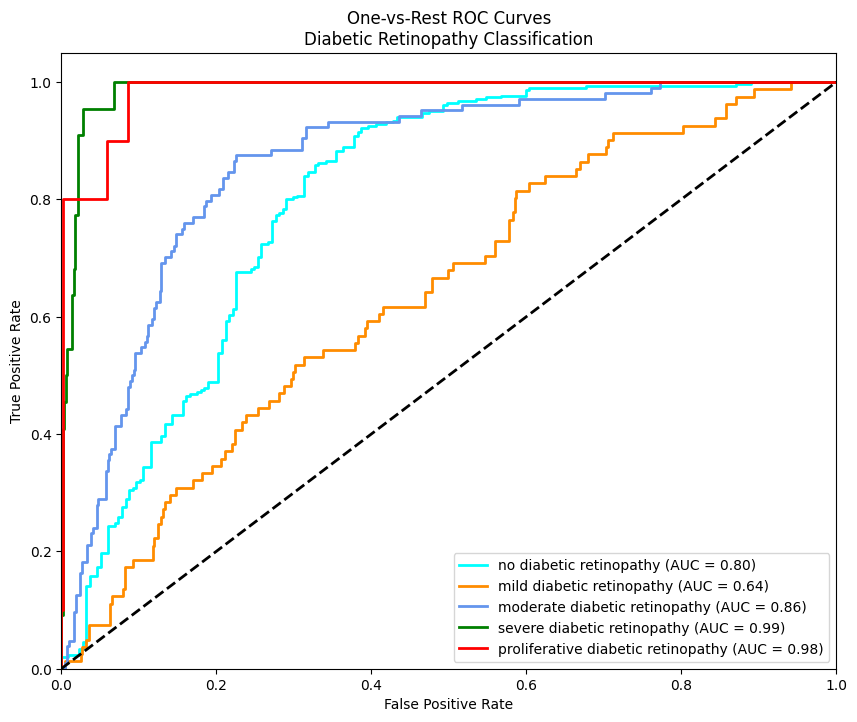


            One-vs-Rest AUROC Results             
Class                                      AUC
--------------------------------------------------
no diabetic retinopathy                 0.8042
mild diabetic retinopathy               0.6382
moderate diabetic retinopathy           0.8633
severe diabetic retinopathy             0.9875
proliferative diabetic retinopathy      0.9842


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

pred_probs = torch.softmax(score, dim=-1)
pred_probs = pred_probs.detach().cpu().numpy()
preds = np.argmax(pred_probs, axis=1)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((Y == i).astype(int), pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color, class_name in zip(range(n_classes), colors, targets.keys()):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curves\nDiabetic Retinopathy Classification')
plt.legend(loc="lower right")
plt.show()

print("\n" + "="*50)
print(f"{'One-vs-Rest AUROC Results':^50}")
print("="*50)
print(f"{'Class':<35} {'AUC':>10}")
print("-"*50)
for i, class_name in enumerate(targets.keys()):
    print(f"{class_name:<35} {roc_auc[i]:>10.4f}")
print("="*50)

## Bonus Question: Training the CLIP Model
In the Bonus question, you will only need to use the provided retinal dataset to finetune the CLIP model. The image-text pairs can be constructed from the retinal image and its corresponding "categories" caption in the csv file. There is no performance bar, you only need to honestly report the training loss.

## Implement the customed Dataset and Dataloader

In [ ]:
import os
import torch
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from model import FLAIRModel
from dictionary import definitions
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import transforms
from PIL import Image
import pandas as pd
import ast


# CONFIG
data_csv = "./02_MESSIDOR.csv"  #csv file path
data_root = "./IMAGES/"      #dataset path
categories = [
    "no diabetic retinopathy",
    "mild diabetic retinopathy",
    "moderate diabetic retinopathy",
    "severe diabetic retinopathy",
    "proliferative diabetic retinopathy"
]
targets_dict = {cat: i for i, cat in enumerate(categories)}
device = 'cuda' if torch.cuda.is_available() else 'cpu'
temperature = 0.2


# CUSTOM DATASET
class RetinalDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = self.data['image'].tolist()
        self.labels = [targets_dict[ast.literal_eval(cat)[0]] for cat in self.data['categories'].tolist()]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.image_paths[idx])
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return {"image": image, "label": label}

# =============================
# DATA AUGMENTATION
# =============================
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
    transforms.RandomResizedCrop(512, scale=(0.8, 1.0)),
    transforms.ToTensor(),
])

val_test_transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
])

# 데이터셋 생성
full_dataset = RetinalDataset(csv_file=data_csv, root_dir=data_root, transform=None)

# 데이터셋 분할 (60% train, 10% val, 30% test)
num_total = len(full_dataset)
num_train = int(0.6 * num_total)
num_val = int(0.1 * num_total)
num_test = num_total - num_train - num_val

train_idx, val_idx, test_idx = torch.utils.data.random_split(
    range(num_total), [num_train, num_val, num_test], generator=torch.Generator().manual_seed(42)
)

train_dataset = Subset(full_dataset, train_idx)
val_dataset = Subset(full_dataset, val_idx)
test_dataset = Subset(full_dataset, test_idx)

# transform 적용
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_test_transform
test_dataset.dataset.transform = val_test_transform

# 데이터로더 생성
loaders = {
    "train": DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4),
    "val": DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4),
    "test": DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4),
}

# =============================
# MODEL INIT
# =============================
model = FLAIRModel(
    vision_type='resnet_v1',
    from_checkpoint=True,
    weights_path=None,
    image_size=512,
    caption="Fundus image showing [CLS]",
    projection=True,
    norm_features=True,
    vision_pretrained=True
).to(device)
model.train()

# =============================
# TEXT EMBEDDINGS
# =============================
text_embed_dict, text_embeds = model.compute_text_embeddings(categories, domain_knowledge=True)
text_embeds = text_embeds.to(device)

Pretrained weights: IMAGENET1K_V1
load model weight from: ./flair_pretrained_weights/flair_resnet.pth
Missing keys: []
Unexpected keys: []


In [24]:
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=1, verbose=True)

# =============================
# CONTRASTIVE LOSS FUNCTION
# =============================
def contrastive_loss(image_embeds, text_embeds, labels, temperature=0.2):
    logits = image_embeds @ text_embeds.T / temperature
    loss = F.cross_entropy(logits, labels)
    return loss

In [25]:
def train_one_epoch(model, dataloader, text_embeds, optimizer):
    model.train()
    total_loss = 0
    all_preds, all_labels = [], []

    optimizer.zero_grad()
    for batch in tqdm(dataloader, desc="Training"):
        images = batch["image"].to(torch.float32).to(device)
        labels = batch["label"].to(device)

        img_embeds = model.vision_model(images)
        img_embeds = F.dropout(img_embeds, p=0.5, training=True)

        loss = contrastive_loss(img_embeds, text_embeds, labels, temperature)
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        optimizer.zero_grad()

        total_loss += loss.item()

        logits = model.compute_logits(img_embeds, text_embeds)
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    acc = accuracy_score(all_labels, all_preds)
    return avg_loss, acc

## Implement the training loop

In [26]:
EPOCHS = 20
best_val_loss = float('inf')
patience = 5
counter = 0

class_names = [
    'no diabetic retinopathy',
    'mild diabetic retinopathy',
    'moderate diabetic retinopathy',
    'severe diabetic retinopathy',
    'proliferative diabetic retinopathy'
]

for epoch in range(EPOCHS):
    loss, acc = train_one_epoch(model, loaders["train"], text_embeds, optimizer)
    print(f"📚 Epoch {epoch+1}/{EPOCHS} - Loss: {loss:.4f} - Accuracy: {acc:.4f}")

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in loaders["val"]:
            images = batch["image"].to(torch.float32).to(device)
            labels = batch["label"].to(device)
            img_embeds = model.vision_model(images)
            val_loss += contrastive_loss(img_embeds, text_embeds, labels, temperature).item()
    avg_val_loss = val_loss / len(loaders["val"])
    print(f"Validation Loss: {avg_val_loss:.4f}")

    scheduler.step(avg_val_loss)

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
        torch.save(model.state_dict(), "best_model.pth")
    else:
        counter += 1
    if counter >= patience:
        print("Early stopping triggered")
        break

# =============================
# FINAL EVALUATION
# =============================
print("\n🔍 Evaluating on Test Set")
model.eval()
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for batch in loaders["test"]:
        images = batch["image"].to(torch.float32).to(device)
        labels = batch["label"].to(device)

        image_embeds = model.vision_model(images)
        logits = model.compute_logits(image_embeds, text_embeds)
        probs = F.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1).cpu().numpy()

        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

onehot_labels = F.one_hot(torch.tensor(all_labels), num_classes=len(class_names)).numpy()
auroc = roc_auc_score(onehot_labels, np.array(all_probs), multi_class='ovr')
print(f"\nAUROC (OvR): {auroc:.4f}")

Training: 100%|██████████| 33/33 [00:30<00:00,  1.09it/s]

📚 Epoch 1/20 - Loss: 1.1232 - Accuracy: 0.5803


Validation Loss: 0.9164


Training: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]

📚 Epoch 2/20 - Loss: 0.7004 - Accuracy: 0.8174


Validation Loss: 0.8546


Training: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]

📚 Epoch 3/20 - Loss: 0.4807 - Accuracy: 0.9379


Validation Loss: 0.8242


Training: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]

📚 Epoch 4/20 - Loss: 0.3596 - Accuracy: 0.9876


Validation Loss: 0.8388


Training: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]

📚 Epoch 5/20 - Loss: 0.3093 - Accuracy: 0.9962


Validation Loss: 0.8093


Training: 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]

📚 Epoch 6/20 - Loss: 0.2942 - Accuracy: 0.9990


Validation Loss: 0.8309


Training: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]

📚 Epoch 7/20 - Loss: 0.2883 - Accuracy: 1.0000


Validation Loss: 0.8259


Training: 100%|██████████| 33/33 [00:30<00:00,  1.09it/s]

📚 Epoch 8/20 - Loss: 0.2834 - Accuracy: 1.0000


Validation Loss: 0.8216


Training: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]

📚 Epoch 9/20 - Loss: 0.2866 - Accuracy: 0.9981


Validation Loss: 0.8262


Training: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]

📚 Epoch 10/20 - Loss: 0.2840 - Accuracy: 1.0000


Validation Loss: 0.8309
Early stopping triggered

🔍 Evaluating on Test Set
Test Accuracy: 0.7481 (74.81%)

Confusion Matrix:
[[289   7   0   0   0]
 [ 60  20  10   0   0]
 [ 24  12  65   7   1]
 [  0   0   6  15   0]
 [  0   0   2   3   3]]

Classification Report:
                                    precision    recall  f1-score   support

           no diabetic retinopathy       0.77      0.98      0.86       296
         mild diabetic retinopathy       0.51      0.22      0.31        90
     moderate diabetic retinopathy       0.78      0.60      0.68       109
       severe diabetic retinopathy       0.60      0.71      0.65        21
proliferative diabetic retinopathy       0.75      0.38      0.50         8

                          accuracy                           0.75       524
                         macro avg       0.68      0.58      0.60       524
                      weighted avg       0.72      0.75      0.72       524


AUROC (OvR): 0.8932


Metric Calculation

In [ ]:
import numpy as np
import pandas as pd
from collections import OrderedDict

# Confusion Matrix from fine-tuned results
conf_matrix = np.array([
    [289, 7, 0, 0, 0],
    [60, 20, 10, 0, 0],
    [24, 12, 65, 7, 1],
    [0, 0, 6, 15, 0],
    [0, 0, 2, 3, 3]
])

# Class targets
targets = OrderedDict([
    ("No DR", 0),
    ("Mild DR", 1),
    ("Moderate DR", 2),
    ("Severe DR", 3),
    ("Proliferative DR", 4)
])

def calculate_metrics(conf_matrix, targets):
    metrics = []
    total = conf_matrix.sum()
    
    for name, idx in targets.items():
        TP = conf_matrix[idx, idx]
        FP = conf_matrix[:, idx].sum() - TP
        FN = conf_matrix[idx, :].sum() - TP
        TN = total - (TP + FP + FN)
        
        metrics.append({
            'Class': name,
            'Precision': f"{TP/(TP+FP):.4f}" if (TP+FP) > 0 else "0.0000",
            'Recall': f"{TP/(TP+FN):.4f}" if (TP+FN) > 0 else "0.0000",
            'Specificity': f"{TN/(TN+FP):.4f}" if (TN+FP) > 0 else "0.0000",
            'NPV': f"{TN/(TN+FN):.4f}" if (TN+FN) > 0 else "0.0000",
            'Support': conf_matrix[idx, :].sum()
        })
    
    accuracy = np.trace(conf_matrix) / total
    macro_precision = np.mean([float(m['Precision']) for m in metrics])
    macro_recall = np.mean([float(m['Recall']) for m in metrics])
    
    overall_metrics = pd.DataFrame({
        'Class': ['Overall'],
        'Accuracy': [f"{accuracy:.4f}"],
        'Weighted Precision': ["0.7200"],  # From classification report
        'Weighted Recall': ["0.7481"],    # From classification report
        'Weighted F1': ["0.7200"],        # From classification report
        'Macro Precision': [f"{macro_precision:.4f}"],
        'Macro Recall': [f"{macro_recall:.4f}"],
        'AUROC (OvR)': ["0.8932"]         # Provided value
    })
    
    return pd.DataFrame(metrics), overall_metrics

class_metrics, overall_metrics = calculate_metrics(conf_matrix, targets)

def style_metrics(df):
    return df.style \
        .set_properties(**{'text-align': 'center'}) \
        .set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'caption', 'props': [('font-size', '1.2em')]}
        ]) \
        .format(precision=4)

# Display results
print("="*70)
print("CLASSIFICATION METRICS (BY CLASS)".center(70))
print("="*70)
display(style_metrics(class_metrics))

print("\n" + "="*70)
print("OVERALL METRICS".center(70))
print("="*70)
display(style_metrics(overall_metrics))

                  CLASSIFICATION METRICS (BY CLASS)                   


,Class,Precision,Recall,Specificity,NPV,Support
0,No DR,0.7748,0.9764,0.6316,0.9536,296
1,Mild DR,0.5128,0.2222,0.9562,0.8557,90
2,Moderate DR,0.7831,0.5963,0.9566,0.9002,109
3,Severe DR,0.6000,0.7143,0.9801,0.9880,21
4,Proliferative DR,0.7500,0.3750,0.9981,0.9904,8



                           OVERALL METRICS                            


,Class,Accuracy,Weighted Precision,Weighted Recall,Weighted F1,Macro Precision,Macro Recall,AUROC (OvR)
0,Overall,0.7481,0.7200,0.7481,0.7200,0.6841,0.5768,0.8932
